# Covariance vs Correlation: Understanding Relationships in Data

**A Complete Guide to Measuring Relationships Between Variables**

#### Outline:
1. Introduction: *Why Do Relationships Matter?*
2. Understanding Covariance
3. Understanding Correlation
4. Covariance vs Correlation: *Key Differences*
5. When to Use Which Measure

## 1. Introduction: Why Do Relationships Matter?

Imagine trying to understand if there's a connection between two things in life, for example:
- Does studying more hours lead to better exam scores?
- Does exercising more frequently relate to better health?
- Does experience in a job correlate with higher salary?

In data science, we constantly ask: *"How do these two variables relate to each other?"*

That's where **covariance** and **correlation** come in as our essential tools for measuring and
understanding relationships between variables.

They both help us with that, but in different ways.

**Importing Libraries**

Let's import the necessary libraries.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2. Understanding Covariance

**Covariance** measures how two variables change together. It tells us:
- Do they move in the **same direction**? (positive covariance)
- Do they move in **opposite directions**? (negative covariance)
- Do they **not move together** at all? (zero or near-zero covariance)

#### The Formula:

```
Cov(X,Y) = Σ[(Xi - X̄)(Yi - Ȳ)] / (n-1)
```

Where:
- *Xi* and *Yi* are individual data points
- *X̄* and *Ȳ* are the means of X and Y
- *n* is the number of observations

#### Example: Positive vs Negative Covariance

In [2]:
# Create simple datasets to illustrate the concept
study_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
exam_scores = np.array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95])

print(f"\nExample Data (Positive Correlation)")
print(f"Study Hours: {study_hours}")
print(f"Exam Scores: {exam_scores}")


price = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
demand = np.array([95, 90, 85, 80, 75, 70, 65, 60, 55, 50])

print(f"\nExample Data (Negative Correlation)")
print(f"Price: {price}")
print(f"Demand: {demand}")


Example Data (Positive Correlation)
Study Hours: [ 1  2  3  4  5  6  7  8  9 10]
Exam Scores: [50 55 60 65 70 75 80 85 90 95]

Example Data (Negative Correlation)
Price: [ 10  20  30  40  50  60  70  80  90 100]
Demand: [95 90 85 80 75 70 65 60 55 50]


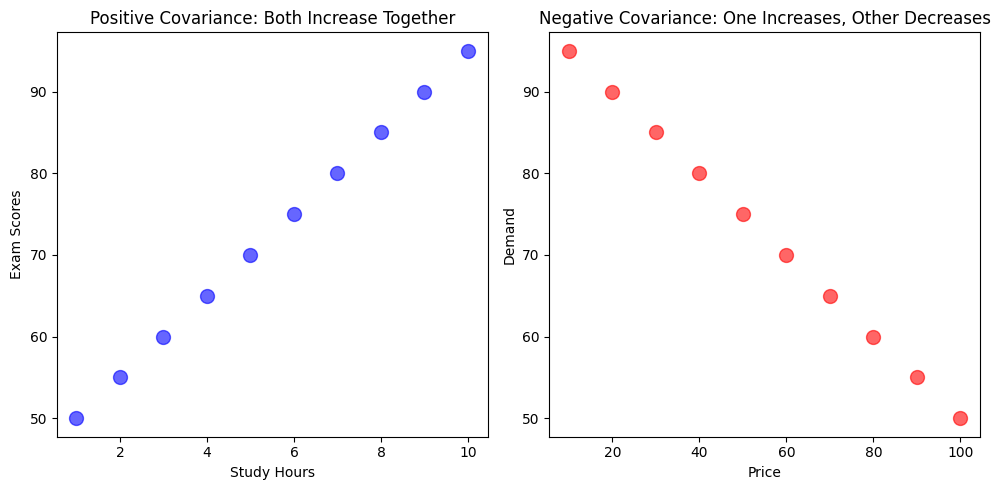

In [4]:
# Visualize positive and negative covariance
plt.figure(figsize=(10, 5))

# Positive Covariance
plt.subplot(1, 2, 1)
mean_hours = np.mean(study_hours)
mean_scores = np.mean(exam_scores)
plt.scatter(study_hours, exam_scores, s=100, alpha=0.6, color='blue')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.title('Positive Covariance: Both Increase Together')

# Negative Covariance
plt.subplot(1, 2, 2)
plt.scatter(price, demand, s=100, alpha=0.6, color='red')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.title('Negative Covariance: One Increases, Other Decreases')

plt.tight_layout()
plt.show()


**Key Observations:**

**Positive Covariance (Study Hours vs Exam Scores):**
- As study hours increase, exam scores increase
- Both variables move in the same direction
- Covariance will be a positive number

**Negative Covariance (Price vs Demand):**
- As price increases, demand decreases
- Variables move in opposite directions
- Covariance will be a negative number

#### Some Ways to Calculate Covariance

#### Method 1: Manual Calculation

**Understanding the steps:**
1. Calculate means of both variables
2. Calculate `(Xi - X̄)(Yi - Ȳ)` for each pair
3. Sum and divide by `(n-1)`

In [7]:
mean_hours = np.mean(study_hours)
mean_scores = np.mean(exam_scores)
cov_manual = np.sum((study_hours - mean_hours) * (exam_scores - mean_scores)) / (len(study_hours) - 1)
print(f"Covariance (Manual): {cov_manual:.2f}")

Covariance (Manual): 45.83


#### Method 2: NumPy `cov()` function
**Note:** `np.cov()` returns a 2×2 covariance matrix so we extract the `[0,1]` element for covariance between the two variables.

In [10]:
cov_numpy = np.cov(study_hours, exam_scores)[0, 1]
print(f"Covariance (NumPy): {cov_numpy:.2f}")

print(f"\nFull matrix:\n{np.cov(study_hours, exam_scores)}")

Covariance (NumPy): 45.83

Full matrix:
[[  9.16666667  45.83333333]
 [ 45.83333333 229.16666667]]


#### Method 3: Pandas

In [12]:
df = pd.DataFrame({'hours': study_hours, 'scores': exam_scores})
cov_pandas = df['hours'].cov(df['scores'])
print(f"Covariance (Pandas): {cov_pandas:.2f}")

print("\nCovariance Matrix:")
cov_matrix = df.cov()
print(cov_matrix)

Covariance (Pandas): 45.83

Covariance Matrix:
            hours      scores
hours    9.166667   45.833333
scores  45.833333  229.166667


All methods give the same result of 45.83.

**Understanding the matrix:**
- **Diagonal elements:** Variance of each variable (covariance with itself)
- **Off-diagonal elements:** Covariance between variables

### Limitations:

1. Looking at the variance and covariance numbers, we can see that these can be hard to interpret. We get different covariance values because the units of covariance depend on the units of the variables being measured.
2. The covariance value doesn't tell us the **STRENGTH** of the relationship, just the direction. Is a covariance of 45.83 strong or weak? We can't tell without context!

## 3. Understanding Correlation

Imagine covariance as a rough compass that tells you if two variables move together or apart, but the numbers are messy and hard to interpret.

**Correlation** takes that same information and standardizes it into a clean score between **-1 and +1**.

We can think of it this way:
- **Covariance:** "These variables seem related, but I can't tell how strongly"
- **Correlation:** "These variables have a strong/moderate/weak relationship"

Correlation solves the scale problem of covariance by **standardizing** it. It measures not just the **DIRECTION**, but also the **STRENGTH** of a relationship between variables.

#### Key Properties:
1. Ranges from **-1 to +1**
2. **Independent of units** (standardized)
3. **+1** means perfect positive relationship
4. **-1** means perfect negative relationship
5. **0** means no relationship

#### Interpretation Guide:

| Correlation Value | Strength |
|-------------------|----------|
| \|r\| = 0.00-0.19 | Very weak |
| \|r\| = 0.20-0.39 | Weak |
| \|r\| = 0.40-0.59 | Moderate |
| \|r\| = 0.60-0.79 | Strong |
| \|r\| = 0.80-1.00 | Very strong |

### Two Types of Correlation

There are two main types of correlation, each suited for different situations:

1. **PEARSON CORRELATION** - Measures LINEAR relationships
2. **SPEARMAN CORRELATION** - Measures MONOTONIC relationships

### 3.1 Pearson Correlation

**Pearson correlation** measures the strength and direction of **LINEAR** relationships. It answers: *"How close do these points fall to a straight line?"*

#### Formula:

```
r = Cov(X,Y) / (σX × σY)
```

Where:
- Cov(X,Y) is the covariance
- σX and σY are the standard deviations of X and Y

*This is essentially standardized covariance!*

#### Best Used When:
- Relationship is expected to be **linear**
- Data is **continuous**
- Variables are **normally distributed** (approximately)
- **No significant outliers**

#### Some Ways to Calculate Pearson Correlation

#### Method 1: Manual Calculation
**Formula:** Correlation = Covariance / (σX × σY)

In [18]:
std_hours = np.std(study_hours, ddof=1) # ddof=1 for sample std
std_scores = np.std(exam_scores, ddof=1)
corr_manual = cov_manual / (std_hours * std_scores)
print(f"Correlation (Manual): {corr_manual:.2f}")

Correlation (Manual): 1.00


#### Method 2: NumPy `corrcoef()` function

In [17]:
corr_numpy = np.corrcoef(study_hours, exam_scores)[0, 1]  # [0, 1] to get the correlation value
print(f"Correlation (NumPy): {corr_numpy:.2f}")

Correlation (NumPy): 1.00


#### Method 3: Pandas `.corr()` function

In [21]:
corr_pandas = df['hours'].corr(df['scores'])
print(f"Correlation (Pandas): {corr_pandas:.2f}")

# Correlation Matrix
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

Correlation (Pandas): 1.00

Correlation Matrix:
        hours  scores
hours     1.0     1.0
scores    1.0     1.0


#### Method 4: SciPy pearsonr() (with p-value)

In [22]:
from scipy.stats import pearsonr
corr_scipy, p_value = pearsonr(study_hours, exam_scores)
print(f"Correlation (SciPy): {corr_scipy:.2f}")
print(f"p-value: {p_value:.4f}")

Correlation (SciPy): 1.00
p-value: 0.0000


**Interpretation:** p < 0.05 means statistically significant

**Note:** All methods give the same result!

### Pearson Correlation Limitations:

1. It expects linear relationship between variables.
2. It is sensitive to outliers as extreme values can significantly change the correlation.

### 3.2 Spearman Correlation

**Spearman correlation** measures the strength and direction of **MONOTONIC** relationships. It answers: *"Do these variables consistently move together in the same direction?"*

#### A Monotonic Relationship Means:
- When one variable increases, the other **consistently increases** (or decreases)
- But **NOT necessarily at a constant rate**

#### How it Works:
1. **Convert actual values to ranks** (1st, 2nd, 3rd, etc.)
2. **Calculate Pearson correlation on the ranks**
3. This makes it **insensitive to the scale of values**

### Best Used When:
- Relationship is **monotonic but not linear**
- Data is **ordinal (ranked)**
- Data contains **outliers**
- Distribution is **skewed or non-normal**

#### Some Ways to Calculate Spearman Correlation

#### Method 1: Manual Using Rank Transformation

Convert values to ranks, then calculates Pearson on ranks.

In [26]:
from scipy.stats import rankdata

x_demo = np.array([10, 20, 30, 40, 50])
y_demo = np.array([1, 4, 9, 16, 25])  # Non-linear but monotonic

x_ranks = rankdata(x_demo)
y_ranks = rankdata(y_demo)
spearman_manual = np.corrcoef(x_ranks, y_ranks)[0, 1]

print(f"  Original values:")
print(f"    X: {x_demo}")
print(f"    Y: {y_demo}")
print(f"  Converted to ranks:")
print(f"    X ranks: {x_ranks}")
print(f"    Y ranks: {y_ranks}")

print(f"\nSpearman Correlation (Manual): {spearman_manual:.2f}")

  Original values:
    X: [10 20 30 40 50]
    Y: [ 1  4  9 16 25]
  Converted to ranks:
    X ranks: [1. 2. 3. 4. 5.]
    Y ranks: [1. 2. 3. 4. 5.]

Spearman Correlation (Manual): 1.00


#### Method 2: SciPy spearmanr()

In [28]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(x_demo, y_demo)
print(f"Spearman Correlation (SciPy): {corr:.2f}")
print(f"p-value: {p_value:.4f}")

Spearman Correlation (SciPy): 1.00
p-value: 0.0000


#### Method 3: Pandas with method='spearman'

In [32]:
df_demo = pd.DataFrame({'x': x_demo, 'y': y_demo})
spearman_pandas = df_demo['x'].corr(df_demo['y'], method='spearman')
print(f"Spearman Correlation (Pandas): {spearman_pandas:.2f}")

# Pandas correlation matrix with Spearman
spearman_matrix = df_demo.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_matrix)

Spearman Correlation (Pandas): 1.00

Spearman Correlation Matrix:
     x    y
x  1.0  1.0
y  1.0  1.0


All methods give the same result!

Spearman Correlation Limitations:

1. It expects the relationship between variables to be monotonic.
2. By converting to ranks, it loses the magnitude information as the difference between 1-2 and 99-100 is treated the same.
3. Variables must have a clear ordering.

## 4. Covariance vs Correlation: Key Differences


#### Side-by-Side Comparison

| Property | Covariance | Correlation |
|----------|------------|-------------|
| **Range** | -∞ to +∞ | -1 to +1 |
| **Unit Dependent** | Yes | No (standardized) |
| **Interpretability** | Difficult | Easy |
| **Shows Direction** | Yes | Yes |
| **Shows Strength** | No | Yes |
| **Scale Invariant** | No | Yes |

#### The Mathematical Relationship:

```
Correlation = Covariance / (Standard Deviation of X × Standard Deviation of Y)
```

*In other words: Correlation is just standardized covariance!*

#### Why Correlation Wins for Interpretation

**Example:**

**Scenario 1 (small numbers):**
- X: [1, 2, 3, 4, 5]
- Y: [2, 4, 6, 8, 10]
- Covariance: 5.00
- Correlation: 1.000

**Scenario 2 (same pattern, larger scale):**
- X: [1000, 2000, 3000, 4000, 5000]
- Y: [2000, 4000, 6000, 8000, 10000]
- Covariance: 5,000,000.00
- Correlation: 1.000

**Observation:**
- Covariances differ by a factor of **1,000,000×**
- Correlations are **identical: 1.000 = 1.000**

**Conclusion:** Correlation correctly identifies that the **RELATIONSHIP is identical**, regardless of scale. Covariance is scale-dependent!


In [34]:
# Create two scenarios with same correlation but different covariances
scenario1_x = np.array([1, 2, 3, 4, 5])
scenario1_y = np.array([2, 4, 6, 8, 10])

scenario2_x = scenario1_x * 1000  # Scale up by 1000
scenario2_y = scenario1_y * 1000  # Scale up by 1000

cov1 = np.cov(scenario1_x, scenario1_y)[0, 1]
cov2 = np.cov(scenario2_x, scenario2_y)[0, 1]
corr1 = np.corrcoef(scenario1_x, scenario1_y)[0, 1]
corr2 = np.corrcoef(scenario2_x, scenario2_y)[0, 1]
print(f"Scenario 1 - Covariance: {cov1:.2f}, Correlation: {corr1:.3f}")
print(f"Scenario 2 - Covariance: {cov2:.2f}, Correlation: {corr2:.3f}")



Scenario 1 - Covariance: 5.00, Correlation: 1.000
Scenario 2 - Covariance: 5000000.00, Correlation: 1.000


## 5. When to Use Which Measure

#### LEVEL 1: Covariance vs Correlation

##### Use COVARIANCE when:
- We need the **actual units**
- We're calculating other statistics that **require covariance**
- Variables are on the **same scale** already

##### Use CORRELATION when:
- We want to understand **relationship strength**
- We're **comparing relationships** across different variable pairs
- We need to communicate findings to **non-technical audiences**
- Variables are on **different scales**
- We're doing **exploratory data analysis (EDA)**
- We need a **standardized, interpretable** measure

#### LEVEL 2: Pearson vs Spearman Correlation

##### Use PEARSON when:
- Relationship is expected to be **linear**
- Data is **continuous and normally distributed**
- **No significant outliers** present
- We need to test for **linear association**

##### Use SPEARMAN when:
- Relationship is **monotonic but not necessarily linear**
- Data is **ordinal (ranked)**
- Data contains **outliers**
- Distribution is **skewed or non-normal**

## Key Takeaways

##### 1. COVARIANCE measures the direction of relationship between two variables
- Range: -∞ to +∞
- Scale-dependent (units matter)
- Hard to interpret strength

##### 2. CORRELATION measures both direction AND strength of relationship
- Range: -1 to +1
- Scale-independent (standardized)
- Easy to interpret
- Mathematical relationship: **Correlation = Covariance / (σX × σY)**

##### 3. PEARSON CORRELATION measures linear relationships
- Best for: Continuous data, linear patterns, normally distributed
- Sensitive to: Outliers

##### 4. SPEARMAN CORRELATION measures monotonic relationships
- Based on: Rank order of values (not actual values)
- Best for: Ordinal data, non-linear monotonic patterns
- Robust to: Outliers and non-normal distributions
- Essentially: Pearson correlation applied to ranks

##### 5. PRACTICAL DECISION MAKING:
- Default to correlation over covariance (more interpretable)
- Start with Pearson for linear relationships
- Use Spearman when data has outliers or non-linear monotonic patterns
- When in doubt, calculate both and compare
- Large differences between Pearson and Spearman indicate non-linearity or outliers
